## Week 14b

$$
f(x) = \frac{x^{-1/2}}{e^x + 1}
$$
Consider this integration:

1. draw 1 million uniform random numbers between 0 and 1
2. evaluate f(x) at the locations of each numbers
3. calculate the mean $I = (b-a) \langle f \rangle$

<ipython-input-6-a3f6be8c3fe0>:4: RuntimeWarning: divide by zero encountered in power
  return x**(-1/2) / (np.exp(x) + 1)


0.8359778797242884
(0.8389329600133838, 1.9939605522267811e-13)


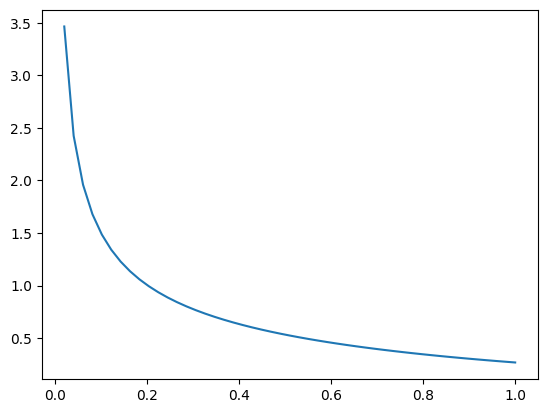

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**(-1/2) / (np.exp(x) + 1)

x_arr = np.linspace(0,1)
y_arr = f(x_arr)
plt.plot(x_arr, y_arr)

# 1.
xi = np.random.rand(10**6)
# 2.
yi = f(xi)
# 3.
b = 1
a = 0
I = (b - a) * np.mean(yi)
print(I)

import scipy
print(scipy.integrate.quad(f, 0 ,1))

$$
p(x) = \frac{1}{2\sqrt{x}} ~ \mbox{for} ~ 0 < x \le 1
$$

1. (By hand) Calculate the cumulative probability distribution  y = F(x)

2. (By hand) calculate the inverse $x = F^{-1}(y)$

3. Draw 1 million points for y: uniform random number between 0 and 1

4. Convert y to x


In [ ]:
# 1.
# F(x) = X^{1/2}
# 2.
# Finv(y) = y^2
# 3.
yi = np.random.rand(10**6)
# 4.
def Finv(y):
    return y**2

xi = Finv(yi)

$$
I \approx \left(\int_0^1 p(x) dx \right) \frac{1}{N}\sum_{i=1}^{N}\frac{f(x_i)}{p(x_i)}
$$

Use the xi sample from step 1, calculate the mean of f(xi) / p(xi)


In [ ]:
def p(x):
    return 1/2/np.sqrt(x)
N = 10**6
I = 1 * (1 / N) * np.sum(f(xi)/p(xi))
print(I)

0.8390860507734311


## Week 14a

Rolling two dice: 1 million times

Use np.random.randint  (documentation)

1. Generate two random numbers between 1 and 6

2. Generate 2x1,000,000 random numbers between 1 and 6.  How many times do you get double six?

3. Plot a histogram of the sum of the two dice.


double six 27914


(array([ 27892.,  55666.,  83188., 110858., 139233., 166267., 139119.,
        111301.,  83158.,  55404.,  27914.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

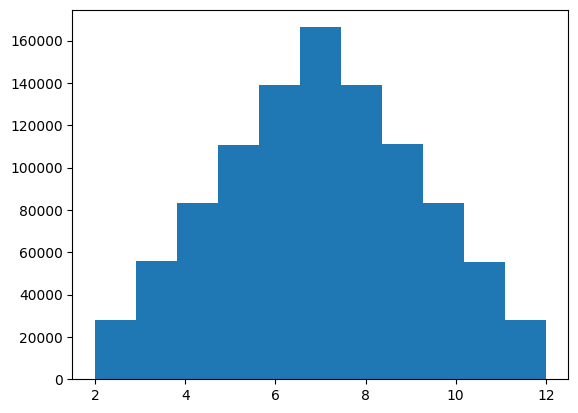

In [ ]:
n = 10**6
die1 = np.random.randint(1, high=7, size=n)
die2 = np.random.randint(1, high=7, size=n)
sum_of_2_dice = die1 + die2

filter_arr = (sum_of_2_dice == 12)
print('double six', len(sum_of_2_dice[filter_arr]))

plt.hist(sum_of_2_dice, bins=11)

Question: How to draw 1,000,000 points so that their histogram will look like this function this function?
$$
f(x) = 2^{-x} {\ln 2}
$$

1. Its CDF is given by $F(x)=1-e^{-x\ln2}$
    Make a plot for both f(x) and F(x), between 0 and 10
2. (By hand) Set y=F(x). Calculate by hand its inverse function $x = F^{-1}(y)$.  
3. Code up this function Finv(y)
4. Draw 1,000,000 random numbers uniformly between 0 and 1, call them yi
5. Use $x = F^{-1}(y)$ to convert yi to xi.  
6. Plot a histogram for xi (with density=True), use bins=100..
7. Over plot f(x).  Does it agree with f(x)?



(0.0, 10.0)

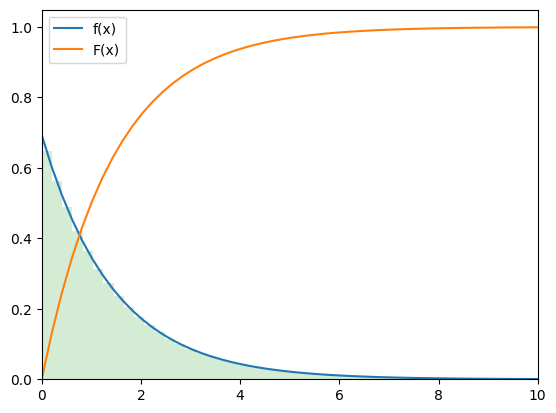

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 2**(-x) * np.log(2)

def F(x):
    return 1 - np.exp(-x * np.log(2))

x_arr = np.linspace(0,10)
y1_arr = f(x_arr)
y2_arr = F(x_arr)
plt.plot(x_arr, y1_arr, label='f(x)')
plt.plot(x_arr, y2_arr, label='F(x)')
plt.legend()

# 3.
def Finv(y):
    return - np.log(1-y)/np.log(2)

# 4.
yi = np.random.rand(10**6)

# 5.
xi = Finv(yi)

# 6.
plt.hist(xi, density=True, bins=100, alpha=0.2)
plt.xlim(0,10)

## Week 13b

Are of 1/4 of a circle:

1. Generate 1,000,000 pairs of (x,y), which are random numbers between 0 and 1
2. Count how many points satisfies: `x**2 + y**2 < 1`
3. What's the fraction of such points?  (should be np.pi /4)


In [ ]:
import numpy as np
n = 10**6 # 1e6 won't work
x = np.random.rand(n)
y = np.random.rand(n)
filter_arr = (x**2 + y**2 < 1)
frac = len(x[filter_arr]) / n
exact = np.pi/4
print('error', (frac-exact)/exact)

error -0.0006533799305417263


#### Monte Carlo Integration
$$
f(x) = \sin^2\left(\frac{1}{x(2-x)}\right)
$$

$$
I = \int_0^2 f(x) dx
$$

1. define $f(x)$ and plot between 0 and 2
2. Calculate $\int_0^2 f(x)dx $ using scipy.integrate.quad (the error should be larger than usual)
3. Let's try Monte Carlo: generate 1,000,000 pairs of (x, y), x is between [0,2], y is between [0,1].  What's the fraction of points satisfy $ y <  \sin^2\left(\frac{1}{x(2-x)}\right)$?

The area of the rectangle is 2.  What's the area under the curve?
Run this a few times.  Do you get the same area every time?

<ipython-input-16-18ac972afdc5>:4: RuntimeWarning: divide by zero encountered in divide
  return np.sin(1/x/(2-x))**2
<ipython-input-16-18ac972afdc5>:4: RuntimeWarning: invalid value encountered in sin
  return np.sin(1/x/(2-x))**2
<ipython-input-16-18ac972afdc5>:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print("scipy results", scipy.integrate.quad(f,0,2))


scipy results (1.4516877509810688, 0.0027123781525913633)
1.45052


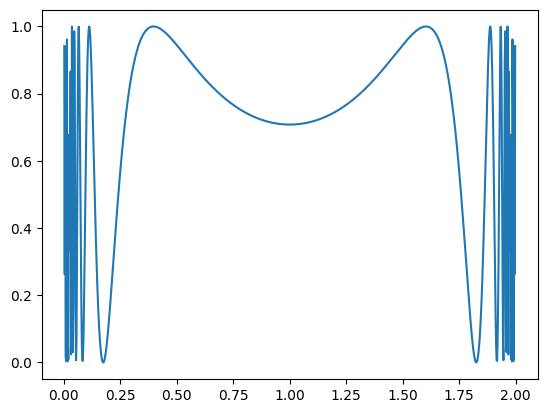

In [ ]:
import scipy
import matplotlib.pyplot as plt
def f(x):
    return np.sin(1/x/(2-x))**2
x_arr = np.linspace(0,2,1000)
y_arr = f(x_arr)
plt.plot(x_arr, y_arr)

print("scipy results", scipy.integrate.quad(f,0,2))


n_rand = 10**6
x_rand = 2 * np.random.rand(n_rand)
y_rand = np.random.rand(n_rand)
filter = (y_rand < f(x_rand))
fraction = len(y_rand[filter])/n_rand
area = fraction * 2
print(area)


Solving the same problem
$$
f(x) = \sin^2\left(\frac{1}{x(2-x)}\right)
$$

$$
I = \int_0^2 f(x) dx
$$
1. create x: 1,000,000 random values between [0,2]
2. calculate the f(x) at these random points
3. take the average of these values, and calculate
Do you get the same answer as before?

In [ ]:
n_rand = 10**6
x_rand = 2 * np.random.rand(n_rand)
f_rand = f(x_rand)
print(np.mean(f_rand) * 2)


1.4521954870284068


## Week 13a

In [ ]:
import numpy as np
np.random.seed(42)
print(np.random.rand())
print(np.random.rand())
print(np.random.rand())

0.3745401188473625
0.9507143064099162
0.7319939418114051


In [ ]:
# leave the seed empty
import numpy as np
np.random.seed()
print(np.random.rand())
print(np.random.rand())
print(np.random.rand())

0.19025395805022693
0.6711907548390242
0.06957742871075923


(array([115.,  93.,  91., 109.,  76., 102.,  96.,  88., 116., 114.]),
 array([-9.99589885e+00, -7.99730668e+00, -5.99871452e+00, -4.00012235e+00,
        -2.00153018e+00, -2.93801154e-03,  1.99565416e+00,  3.99424632e+00,
         5.99283849e+00,  7.99143066e+00,  9.99002283e+00]),
 <BarContainer object of 10 artists>)

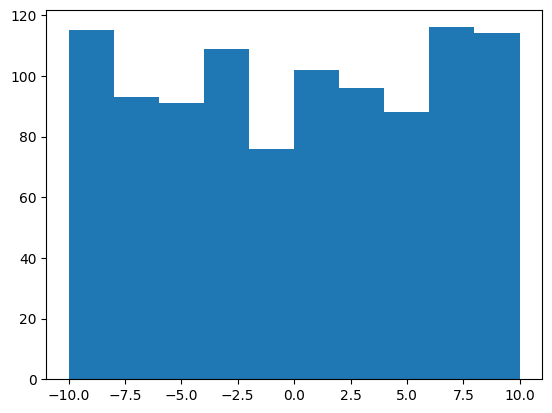

In [ ]:
## generate 10 random numbers between -10 and 10
scale = 20
shift = 10
my_random_numbers = scale * np.random.rand(1000) - shift
import matplotlib.pyplot as plt
plt.hist(my_random_numbers)


In [ ]:
# a biased coin with 20% heads
# toss 1000 times
toss = np.random.rand(1000)
# how many heads?
filter_arr = (toss < 0.2)
heads = toss[filter_arr]
print(len(heads))

205


At a given time Δt, an atom A at has some probability of decaying into an atom B.
This probability is given by      
$$
p = 1 - 2 ^{-\Delta t/\tau}
$$

Let's consider τ = 180 s (called half life), and Δt = 1 s.

Now assume we have 1000 A's.

Let's simulate the number of A's and B's as a function of time, for t=0, 1, 2, …, 1000 seconds.

First, set up n_A = 1000, n_B = 0.
1. At t = 1s, how many A's are left?
2. What about  t = 2s?
3. Write a for-loop, for t = 1, 2, …, 1000s


0.003843412779424793
0
1


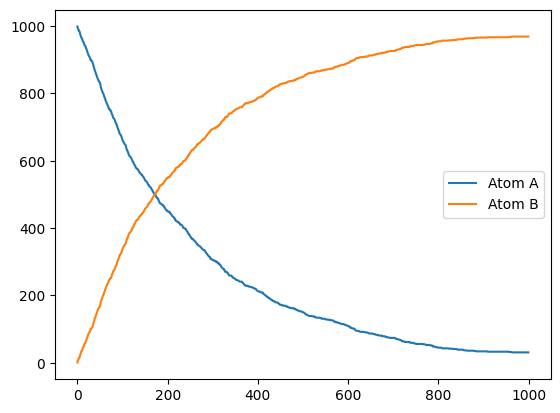

In [ ]:
np.random.seed(42)
tau = 180
Delta_t = 1
p = 1 - 2**(-Delta_t / tau)
print(p)


n_A = 1000
n_B = 0
# after 1 second, atom A has probability p to decay
toss = np.random.rand(n_A)
filter_arr = (toss < p)
decay = toss[filter_arr]
number_decayed = len(decay)
print(number_decayed)

## after 2 seconds
n_A = n_A - number_decayed
n_B = n_B + number_decayed
toss = np.random.rand(n_A)
filter_arr = (toss < p)
decay = toss[filter_arr]
number_decayed = len(decay)
print(number_decayed)


n_A_list = []
n_B_list = []
time_list = np.arange(1000)

for i in time_list:
    n_A = n_A - number_decayed
    n_B = n_B + number_decayed
    toss = np.random.rand(n_A)
    filter_arr = (toss < p)
    decay = toss[filter_arr]
    number_decayed = len(decay)
    #print(number_decayed)

    n_A_list.append(n_A)
    n_B_list.append(n_B)

plt.plot(time_list, n_A_list, label='Atom A')
plt.plot(time_list, n_B_list, label='Atom B')
plt.legend()
plt.xlabel('time [sec]')
plt.ylabel('number')

## Week 12b

$$
\frac{d^2x}{dt^2} = -x
$$

Please don't solve it by hand :)

Initial condition: x=1, dx/dt = 0 at t = 0

Plot x(t) for t from 0 to 50

Step 1: convert it to 2 first-order equations

Step 2: use `scipy.integrate.solve_ivp`

Repeat for
$$
\frac{d^2x}{dt^2} = -x^3
$$


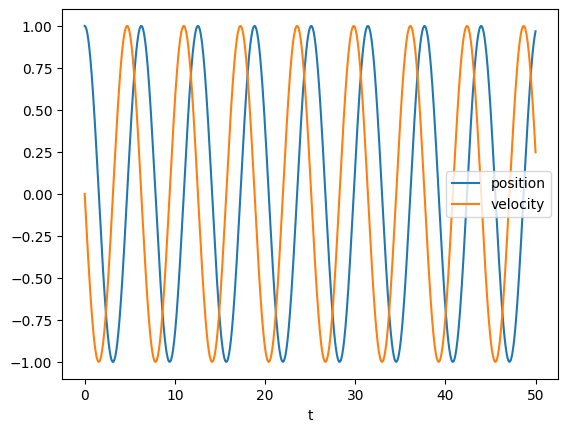

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt


def f(t, vector):
    x = vector[0]
    v = vector[1]
    dxdt = v
    dvdt = -x
    return dxdt, dvdt

x0 = 1
v0 = 0
vector_initial = [x0, v0]
sol = scipy.integrate.solve_ivp(f, t_span=(0,50), y0=vector_initial,
                                t_eval=np.linspace(0,50,2000))
t_sol = sol.t
x_sol = sol.y[0]
v_sol = sol.y[1]
plt.plot(t_sol, x_sol, label='position')
plt.plot(t_sol, v_sol, label='velocity')
plt.xlabel('t')
plt.legend()

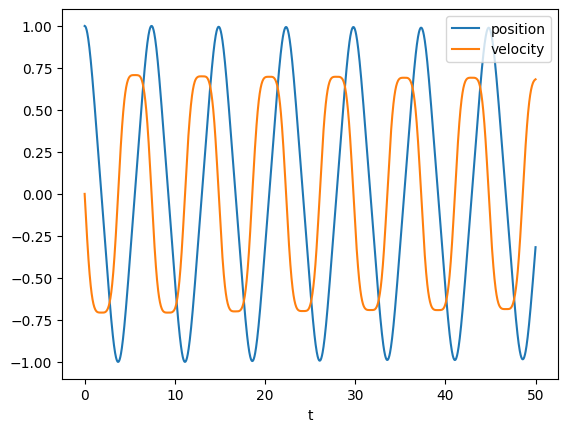

In [ ]:
## part 2

def f(t, vector):
    x = vector[0]
    v = vector[1]
    dxdt = v
    dvdt = -x**3
    return dxdt, dvdt

x0 = 1
v0 = 0
vector_initial = [x0, v0]
sol = scipy.integrate.solve_ivp(f, t_span=(0,50), y0=vector_initial,
                                t_eval=np.linspace(0,50,2000))
t_sol = sol.t
x_sol = sol.y[0]
v_sol = sol.y[1]
plt.plot(t_sol, x_sol, label='position')
plt.plot(t_sol, v_sol, label='velocity')
plt.xlabel('t')
plt.legend()

Projectile motion: initial height y(t=0)=0, initial velocity v(t=0)=20
(Please don't solve it by hand)  g = 9.8

$$
\frac{d^2y}{dt^2} = -g
$$
Solve y(t) and make a plot

Initial conditions y(t=0)=0, v(t=0)=20

First, rewrite it into two first order equations, one for y and the other for v=dy/dt

Then solve them using scipy.integrate.solve_ivp, from t=0 to t=5

Plot y(t)


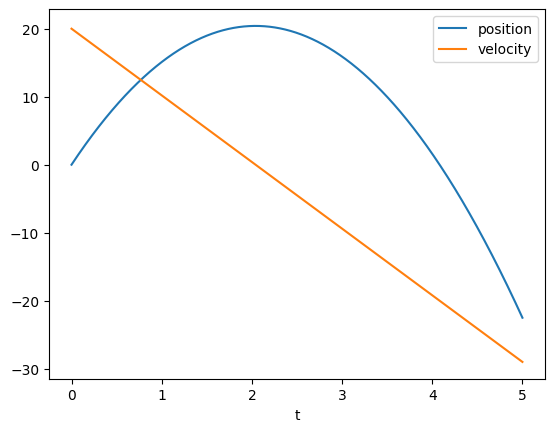

In [ ]:
g = 9.8
def f(t, vector):
    x = vector[0]
    v = vector[1]
    dxdt = v
    dvdt = -g
    return dxdt, dvdt

x0 = 0
v0 = 20
vector_initial = [x0, v0]
sol = scipy.integrate.solve_ivp(f, t_span=(0,5), y0=vector_initial,
                                t_eval=np.linspace(0,5,2000))
t_sol = sol.t
x_sol = sol.y[0]
v_sol = sol.y[1]
plt.plot(t_sol, x_sol, label='position')
plt.plot(t_sol, v_sol, label='velocity')
plt.xlabel('t')
plt.legend()

$$
\frac{d^2 x}{dt^2} + \frac{dx}{dt} + x = 0
$$

Initial condition: x(t=0)=3.  dx/dt(x=0)=1
1. (by hand) convert it into 2 first-order ordinary differential equations
2. (code) solve x(t) from t=0 to 10
3. (code) plot x(t) from t=0 to 10


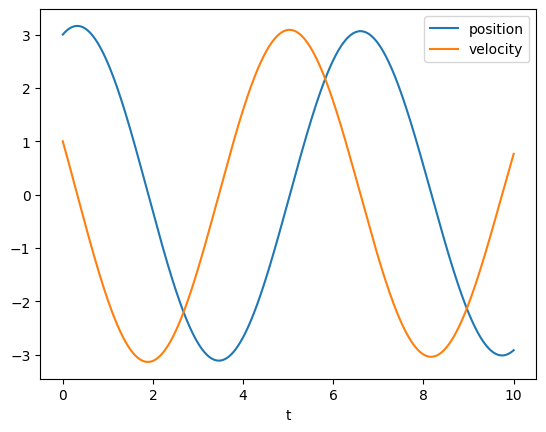

In [ ]:
def f(t, vector):
    x = vector[0]
    v = vector[1]
    dxdt = v
    dvdt = -v - x
    return dxdt, dvdt

x0 = 3
v0 = 1
vector_initial = [x0, v0]
sol = scipy.integrate.solve_ivp(f, t_span=(0,10), y0=vector_initial,
                                t_eval=np.linspace(0,10,2000))
t_sol = sol.t
x_sol = sol.y[0]
v_sol = sol.y[1]
plt.plot(t_sol, x_sol, label='position')
plt.plot(t_sol, v_sol, label='velocity')
plt.xlabel('t')
plt.legend()

## Week 12a


$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\beta I S }{N} \\
\frac{dI}{dt} &= \frac{\beta I S }{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I
\end{aligned}
$$

N = 1000, beta = 0.4, gamma = 0.04

N = S(t) + I(t) + R(t) (total population doesn't change)

Initial condition:

S(t=0) = 997

I(t=0) = 3

R(t=0) = 0

Solve: from t = 0 to 100

Plot S(t), I(t), R(t)





  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.010e+00 ...  9.899e+01  1.000e+02]
        y: [[ 9.970e+02  9.955e+02 ...  6.602e-02  6.505e-02]
            [ 3.000e+00  4.309e+00 ...  3.745e+01  3.597e+01]
            [ 0.000e+00  1.461e-01 ...  9.625e+02  9.640e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 116
     njev: 0
      nlu: 0


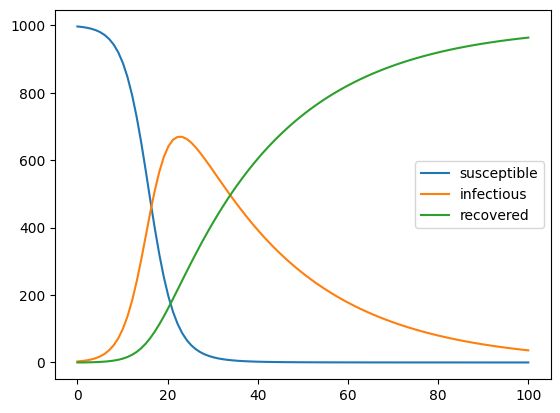

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
beta = 0.4
gamma = 0.04
def f(t, pop):
    s = pop[0]
    i = pop[1]
    r = pop[2]
    n = s + i + r
    dsdt = -beta * i * s / n
    didt = beta * i * s / n - gamma * i
    drdt = gamma * i
    return dsdt, didt, drdt

pop_ini = [997, 3, 0]
sol = solve_ivp(f, t_span=(0,100), y0=pop_ini, t_eval=np.linspace(0,100,100))
print(sol)
s_sol = sol.y[0]
i_sol = sol.y[1]
r_sol = sol.y[2]
t_sol = sol.t
plt.plot(t_sol, s_sol, label='susceptible')
plt.plot(t_sol, i_sol, label='infectious')
plt.plot(t_sol, r_sol, label='recovered')
plt.legend()

#### Practice 2:
Same initial condition

Let's keep gamma = 0.04, and change beta

Plot the following:

Plot I(t) for beta = 0.4

Plot I(t) for beta = 0.1

Plot I(t) for beta = 0.05

Plot I(t) for beta = 0.03

Calculate t = 0 to 1000

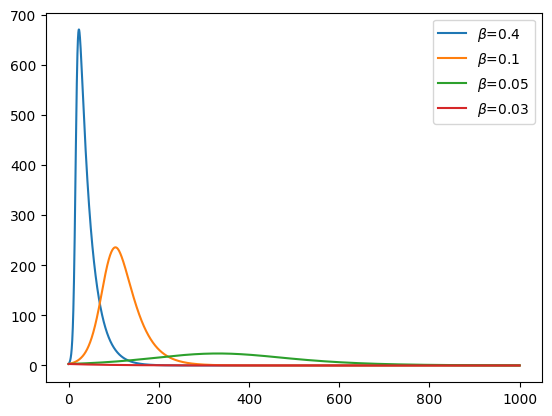

In [ ]:
def infectious_pop(beta):
    gamma = 0.04
    def f(t, pop):
        s = pop[0]
        i = pop[1]
        r = pop[2]
        n = s + i + r
        dsdt = -beta * i * s / n
        didt = beta * i * s / n - gamma * i
        drdt = gamma * i
        return dsdt, didt, drdt

    pop_ini = [997, 3, 0]
    sol = solve_ivp(f, t_span=(0,1000), y0=pop_ini, t_eval=np.linspace(0,1000,10000))
    #print(sol)
    s_sol = sol.y[0]
    i_sol = sol.y[1]
    r_sol = sol.y[2]
    t_sol = sol.t
    return t_sol, i_sol

for beta in [0.4, 0.1, 0.05, 0.03]:
    t1, i1 = infectious_pop(beta)
    plt.plot(t1, i1, label=r'$\beta$='+f'{beta}')
plt.legend()

## Week 11b

$$
\frac{dx}{dt} = -x^3 + \sin(t)
$$
Initial condition: x=0, t=0.  
solve x(t) for t from 0 to 10
(note that Python uses y instead of x0)
plot x vs. t
(hint: you can add t_eval = np.linspace(0,10))

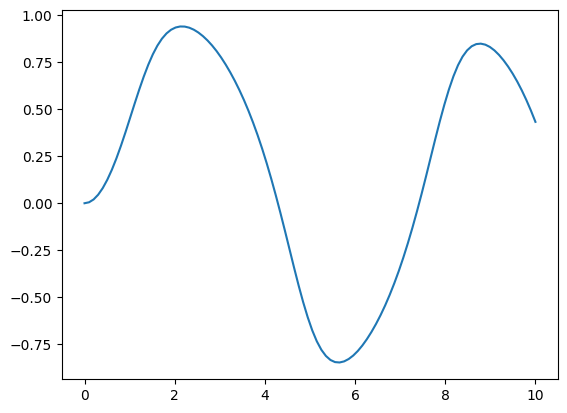

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# write your problem in the form of
# dx/dt = f(t, x)
# define a function of the right-hand side
def f(t, x):
   dxdt = -x**3 + np.sin(t)
   return dxdt

t_span = [0,10] # time range we want to solve
x0 = [0] # initial location
sol = solve_ivp(f, t_span, x0, t_eval = np.linspace(0,10,100))
t_sol = sol.t
x_sol = sol.y[0]
plt.plot(t_sol, x_sol)

$$
\begin{aligned}
\frac{dx}{dt} &= xy  - x \\
\frac{dy}{dt} &= y - xy +  \sin^2t
\end{aligned}
$$

Initial condition: x = y = 1 at t = 0

Plot x(t) for t = 0 to 10

Plot y(t) for t = 0 to 10 (in a separate plot)

Hint 1: Python calls the dependent variable y, but let's call it r, and it is now an array

Hint 2: r is an array r = [x,y],
initial condition is an array r0 = [x0, y0],
and f(t, r) returns an array [fx, fy]


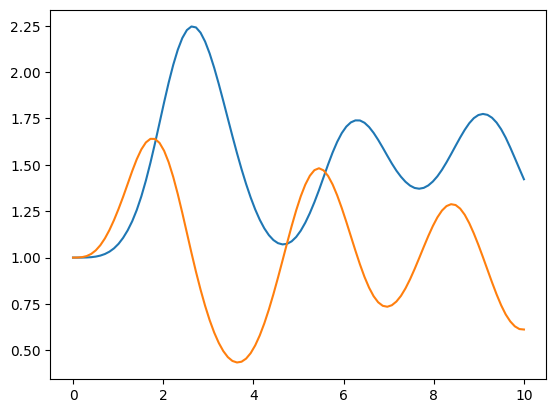

In [ ]:
def f(t, r):
 x = r[0]
 y = r[1]
 dxdt = x * y - x
 dydt = y - x * y + np.sin(t)**2
 return dxdt, dydt

from scipy.integrate import solve_ivp
sol = solve_ivp(f, t_span = [0,10] , y0 = [1,1], t_eval=np.linspace(0,10,100))
t_sol = sol.t
x_sol = sol.y[0]
y_sol = sol.y[1]
plt.plot(t_sol, x_sol)
plt.plot(t_sol, y_sol)


## Week 11a

$$
f(x) = 5 e^{-x} + x -5
$$

Obviously, x=0 is a root for f(x)=0.  But we want the other root.

1. First, plot f(x) and see where the root might be.  

2. Try different plotting ranges. Add a horizontal line y = 0.

3. Use method='brentq' (a binary method) to find the root for f(x) = 0.

4. Use method='newton' to find the root.  Hint: need fprime

      converged: True
           flag: converged
 function_calls: 42
     iterations: 40
           root: 4.965114231743428
result.root 4.965114231743428

 newtons method result       converged: True
           flag: converged
 function_calls: 6
     iterations: 3
           root: 4.965114231744276


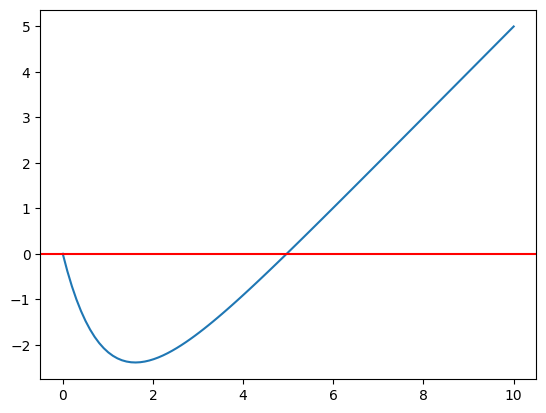

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 1.
def f(x):
    return 5 * np.exp(-x) + x - 5

x_arr = np.linspace(0, 10, 100)
y_arr = f(x_arr)
plt.plot(x_arr, y_arr)

# 2.
plt.axhline(0, c='red')

# 3. Bisection method
import scipy
result = scipy.optimize.root_scalar(f, method='bisect', bracket=[4,6])
print(result)
print('result.root', result.root)

#4. Newton's method
def fprime(x):
    return -5 * np.exp(-x) + 1

result2 = scipy.optimize.root_scalar(f, x0=5, method='newton', fprime=fprime)

print('\n newtons method result', result2)


## Week 10b

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

$$
\chi^2 = \sum_i (y_i - f(x_i))^2
$$

Let's assume mu = 0 and we want to find sigma
1. Code up this f(x, sigma) function
2. Code up a function: chi_squared(sigma) for this data set & model.  
3. Minimize the chi-squared.  Find the sigma value that minimizes chi-squared


In [ ]:
import numpy as np
x = np.array([-0.34450244, -0.27538229, -0.20626214, -0.13714199, -0.06802183, 0.00109832,  0.07021847,  0.13933862,  0.20845877,  0.27757892])
y = np.array([0.02893512, 0.05787024, 0.56423488, 1.34548316, 3.24073364, 3.73263071, 3.19733096, 1.67823706, 0.44849439, 0.17361073])

In [ ]:
import matplotlib.pyplot as plt
import scipy

def f(x, sigma):
    mu = 0
    fac = 1/sigma/np.sqrt(2*np.pi)
    exponent = -0.5 * (x-mu)**2 / sigma**2
    return fac * np.exp(exponent)

def chi_squared(sigma):
    return np.sum((y - f(x, sigma))**2)

scipy.optimize.minimize(chi_squared, 1)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.14313178208191518
        x: [ 1.029e-01]
      nit: 5
      jac: [-6.519e-07]
 hess_inv: [[ 1.759e-04]]
     nfev: 38
     njev: 19

```
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([  0. ,  -3.8,  -1.6,   6.6,  20.8,  41. ,  67.2,  99.4, 137.6, 181.8])
```
1. Plot y vs. x
2. Make the interpolation function f(x) = y(x) and find the y value at x = 4.3
3. Put these this new point on the same plot (plt.scatter)
4. Make the interpolation function g(y) = x(y) and find the x value at y = 50
5. Put these this new point on the same plot (plt.scatter)



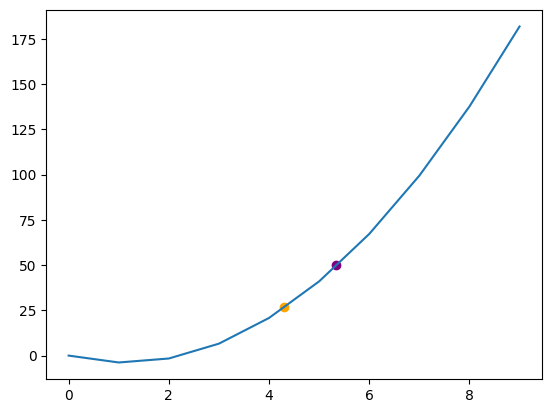

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([  0. ,  -3.8,  -1.6,   6.6,  20.8,  41. ,  67.2,  99.4, 137.6, 181.8])
# 1.
plt.plot(x,y)
f_interp = scipy.interpolate.interp1d(x, y)
# 2.
x_new = 4.3
y_new = f_interp(x_new)
# 3.
plt.scatter(x_new, y_new, color='orange')
# 4.
g_interp = scipy.interpolate.interp1d(y, x)
y_new_2 = 50
x_new_2 = g_interp(y_new_2)
plt.scatter(x_new_2, y_new_2, color='purple')

## Week 10a


```
import numpy as np
x = np.array([120.61051228, 125.31693251, 125.31726086, 127.23471398,
      139.93428306, 140.85120087, 142.95377076, 145.34869458,
      160.46059713, 161.58425631])
y = np.array([63.65868476, 64.59765675, 65.30541444, 63.53366255, 66.26193878,
      67.60795265, 67.57792303, 69.38398625, 71.18409535, 70.90454756])
```
1. calculate xbar, ybar
2. calculate b and a
3. compare with `np.polynomial.polynomial.polyfit` results


40.85283754568191 0.18817298988839934


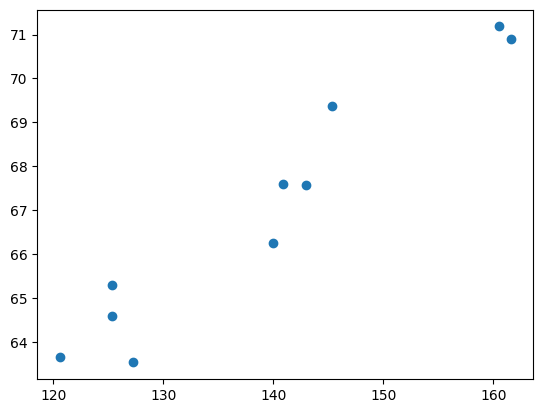

In [ ]:
import numpy as np
x = np.array([120.61051228, 125.31693251, 125.31726086, 127.23471398,
      139.93428306, 140.85120087, 142.95377076, 145.34869458,
      160.46059713, 161.58425631])
y = np.array([63.65868476, 64.59765675, 65.30541444, 63.53366255, 66.26193878,
      67.60795265, 67.57792303, 69.38398625, 71.18409535, 70.90454756])

xbar = np.mean(x)
ybar = np.mean(y)

import matplotlib.pyplot as plt
plt.scatter(x,y)


top = np.sum((x-xbar)*(y-ybar))
bottom = np.sum((x-xbar)**2)
b = top/bottom
a = ybar

#### using polyfit
c0, c1 = np.polynomial.polynomial.polyfit(x, y, deg=1)
print(c0, c1)



```
import numpy as np
import matplotlib.pyplot as plt
x = np.array([120.61051228, 125.31693251, 125.31726086, 127.23471398, 139.93428306, 140.85120087, 142.95377076, 145.34869458, 160.46059713, 161.58425631])
y = np.array([63.65868476, 64.59765675, 65.30541444, 63.53366255, 66.26193878,
 67.60795265, 67.57792303, 69.38398625, 71.18409535, 70.90454756])
sigma_y = np.array([0.58065631, 1.01441054, 0.26079558, 0.65342395, 0.78509076, 0.06280835, 0.82113238, 0.23663287, 0.09261278, 1.34560599])
```
1. use `plt.errorbar` to make a plot with error bars
2. use `np.polynomial.polynomial.polyfit` to fit a line, with w = 1/sigma_y
3. add the best-fit model to the plot
4. calculating the chi_square


28.40212522485931
DOF =  8


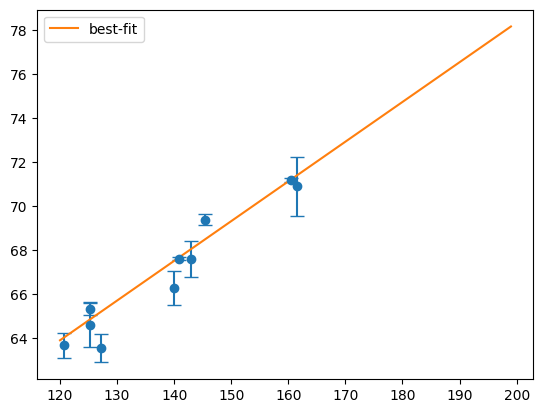

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([120.61051228, 125.31693251, 125.31726086, 127.23471398, 139.93428306, 140.85120087, 142.95377076, 145.34869458, 160.46059713, 161.58425631])
y = np.array([63.65868476, 64.59765675, 65.30541444, 63.53366255, 66.26193878,
 67.60795265, 67.57792303, 69.38398625, 71.18409535, 70.90454756])
sigma_y = np.array([0.58065631, 1.01441054, 0.26079558, 0.65342395, 0.78509076, 0.06280835, 0.82113238, 0.23663287, 0.09261278, 1.34560599])
# 1.
plt.errorbar(x, y, sigma_y, ls='', capsize=5, marker='o')
# 2.
c0, c1 = np.polynomial.polynomial.polyfit(x, y, deg=1, w=1/sigma_y)
# 3.
# want to plot f(x) = c0 + c1 * x
x_arr = np.arange(120, 200)
y_arr = c0 + c1 * x_arr
plt.plot(x_arr, y_arr, label='best-fit')
plt.legend()
# 4.
chisqr = np.sum((y - (c0 + c1 * x))**2/sigma_y**2)
print(chisqr)
degree_of_freedom = len(x) - 2
print('DOF = ', degree_of_freedom)

$$f(x) = 1/x^6 - e^{-x}$$   (potential energy of interactions between atoms)

1. Plot f(x)
2. Find x where f(x) is the lowest


[1.63050954]


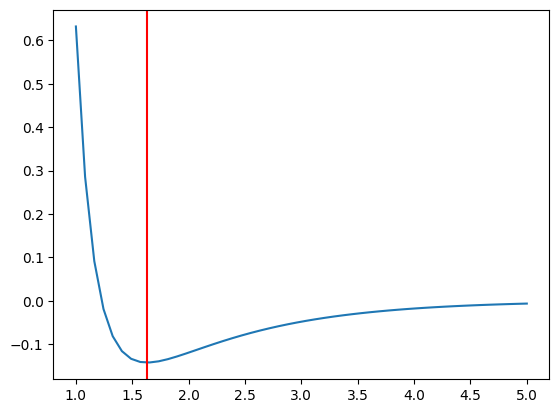

In [ ]:
def f(x):
    return x**(-6) - np.exp(-x)
x = np.linspace(1, 5)
y = f(x)
plt.plot(x,y)

x0 = 1.5
import scipy
result = scipy.optimize.minimize(f, x0)
print(result.x)
plt.axvline(result.x, c='red')

## Week 9a

$$A=
\begin{bmatrix}
2 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -1 & 2
\end{bmatrix}
$$
Use `numpy.linalg` to

1. Calculate the determinant
2. Calculate the eigenvalues and eigenvectors
3. Verify that $A = X \Lambda X^T$
4. Calculate the singular values, left singular vectors, and right singular vectors
5. Verify that $A = U \Sigma V^T$
6. What's the relation between eigenvalue decomposition and singular value decomposition for this matrix?

In [ ]:
import numpy as np
from numpy import linalg
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])

In [ ]:
# 1.
print('det', linalg.det(A))
# 2.
eigenvalues, eigenvectors = linalg.eig(A)
print('eigenvalues', eigenvalues)
print('eigenvectors', eigenvectors)
# 3.
Lambda = np.diag(eigenvalues)
X = eigenvectors
product = X @ Lambda @ X.T
print(np.allclose(product, A))
# 4.
U, sigma, VT = linalg.svd(A)
print('left singgular vectors', U)
print('right singgular vectors', VT.T)
print('siggular values', sigma)
# 5.
Sigma = np.diag(sigma)
product = U @ Sigma @ VT
print(np.allclose(product, A))
# The singular values and eigenvalues are the same!

det 4.0
eigenvalues [3.41421356 2.         0.58578644]
eigenvectors [[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  4.05405432e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]
True
left singgular vectors [[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01 -3.88578059e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]
right singgular vectors [[-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  1.11022302e-16  7.07106781e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]
siggular values [3.41421356 2.         0.58578644]
True


$$A=
\begin{bmatrix}
1 & -1 & 0 \\
0 & 1 & -1 \\
1 & 0 & -1
\end{bmatrix}
$$

Use `numpy.linalg` to

1. Calculate the determinant
2. Calculate the eigenvalues and eigenvectors
3. Verify that $A = X \Lambda X^{-1}$
4. Calculate the singular values, left singular vectors, and right singular vectors
5. Verify that $A = U \Sigma V^T$
6. What's the relation between eigenvalue decomposition and singular value decomposition for this matrix?

In [ ]:
import numpy as np
from numpy import linalg
A = np.array([[1,-1,0],[0,1,-1],[1,0,-1]])
# 1.
print('det', linalg.det(A))
# 2.
eigenvalues, eigenvectors = linalg.eig(A)
print('eigenvalues', eigenvalues)
print('eigenvectors', eigenvectors)
# 3.
Lambda = np.diag(eigenvalues)
X = eigenvectors
X_inv = linalg.inv(X)
product = X @ Lambda @ X_inv # X inverse instead of X.T
print(np.allclose(product, A))
# 4.
U, sigma, VT = linalg.svd(A)
print('left singgular vectors', U)
print('right singgular vectors', VT.T)
print('siggular values', sigma)
# 5.
Sigma = np.diag(sigma)
product = U @ Sigma @ VT
print(np.allclose(product, A))
# The singular values and eigenvalues are NOT the same!

det 0.0
eigenvalues [-6.18033989e-01 -4.57966998e-16  1.61803399e+00]
eigenvectors [[-0.30901699 -0.57735027  0.80901699]
 [-0.5        -0.57735027 -0.5       ]
 [-0.80901699 -0.57735027  0.30901699]]
True
left singgular vectors [[-7.07106781e-01  4.08248290e-01 -5.77350269e-01]
 [-7.40148683e-17 -8.16496581e-01 -5.77350269e-01]
 [-7.07106781e-01 -4.08248290e-01  5.77350269e-01]]
right singgular vectors [[-8.16496581e-01  6.67887173e-17  5.77350269e-01]
 [ 4.08248290e-01 -7.07106781e-01  5.77350269e-01]
 [ 4.08248290e-01  7.07106781e-01  5.77350269e-01]]
siggular values [1.73205081e+00 1.73205081e+00 3.06579623e-17]
True


$$
A = \begin{bmatrix}
5 & 7 & -1 \\
7 & 3 & 2 \\
-1 & 2 & 4
\end{bmatrix}
$$

1. Perform the Singular Value Decomposition  $A = U \Sigma V^T$.  Print $U$ and $\Sigma$.
2. Calculate the eigenvalues and eigenvectors of $A A^T$
3. What's the relation between the singular values of A and the eigenvalues of $A A^T$



In [ ]:
import numpy as np
from numpy import linalg
A = np.array([[5,7,-1],[7,3,2],[-1,2,4]])

In [ ]:
# 1.
U, sigma, VT = linalg.svd(A)
print('left singular vector', U)
print('singular values', sigma)
# 2.
AAT = A @ A.T
eigenvalues, eigenvectors = linalg.eig(AAT)
print('eigenvalues', eigenvalues)
# The singular values of A is the positive square root of A A.T!
np.sqrt(eigenvalues)

left singular vector [[-0.7447288   0.23996768  0.62273151]
 [-0.66237167 -0.15182194 -0.73363061]
 [-0.08150332 -0.95883555  0.27201397]]
singular values [11.11645256  4.56694974  3.6834023 ]
eigenvalues [123.57551753  13.56745252  20.85702994]


array([11.11645256,  3.6834023 ,  4.56694974])

$$
A = \begin{bmatrix}
2 & 4 & 6 & 8 \\
-1 & 0 & 1 & 0 \\
1 & 2 & 3 & 4 \\
1 & 4 & 7 & 8
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
12 \\
0 \\
6 \\
12
\end{bmatrix}
$$

1. Calculate the LU decomposition of A.   What is the dimension of the null-space of A? What is the rank of A?
2. Calculate the eigenvalues of A. How many eigenvalues are 0 (within numerical accuracy)?
3. Perform the SVD of A using "full_matrices=False".  How many singular values are 0?
4. Construct a matrix Sigma_inv = np.diag(1/sigma_i).  When $\sigma_i$ = 0, replace 1/sigma by 0
5. Calculate the pseudo-inverse A+ = V Sigma_inv UT  , and find $x = A^+ b$
6. Use "scipy.linalg.lstsq" (least square) to solve A x = b.  Do you get the same solution?



In [ ]:
import numpy as np
from scipy import linalg
A = np.array([2,4,6,8,-1,0,1,0,1,2,3,4,1,4,7,8]).reshape(4,4)

In [ ]:
# 1.
P, L, U = linalg.lu(A)
print(U)
print('two rows are all zeros => null space = 2')
print('two rows are not all-zeros => rank = 2 (4 - 2)')
# 2.
eigenvalues, eigenvectors = linalg.eig(A)
print('eigenvlues', eigenvalues)
print('two eigenvalues are zero!')
# 3.
U, sigma, VT = linalg.svd(A, full_matrices=False)
print('singular values', sigma)
print('two signular values are zero!')
# 4.
sigma_inv = 1/sigma
sigma_inv[sigma_inv > 1e10] = 0 # replace infinify by zero!!!
Sigma_inv = np.diag(sigma_inv)
print('Sigma_inv', Sigma_inv)
# 5.
Aplus = VT.T @ Sigma_inv @ U.T
print('Aplus', Aplus)
b = np.array([[12], [0], [6], [12]])
x = Aplus @ b
print('x', x)
# 6.
print('least square solution', linalg.lstsq(A, b))

[[2. 4. 6. 8.]
 [0. 2. 4. 4.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
two rows are all zeros => null space = 2
two rows are not all-zeros => rank = 2 (4 - 2)
eigenvlues [ 1.25207973e+01+0.j  4.79202711e-01+0.j -5.49147729e-16+0.j
 -3.27845630e-15+0.j]
two eigenvalues are zero!
singular values [1.67090363e+01 1.67573997e+00 3.15135948e-16 6.79421900e-17]
two signular values are zero!
Sigma_inv [[0.05984786 0.         0.         0.        ]
 [0.         0.5967513  0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Aplus [[ 0.18367347 -0.37755102  0.09183673 -0.19387755]
 [ 0.04081633 -0.05612245  0.02040816 -0.01530612]
 [-0.10204082  0.26530612 -0.05102041  0.16326531]
 [ 0.08163265 -0.1122449   0.04081633 -0.03061224]]
x [[0.42857143]
 [0.42857143]
 [0.42857143]
 [0.85714286]]
least square solution (array([[0.42857143],
       [0.42857143],
       [0.42857143],
       [0.85714286]]), array([], dtype=float64), 2, array([1.6709036

```
import numpy as np
x = np.array([63.65868476, 64.59765675, 65.30541444, 63.53366255, 66.26193878,
      67.60795265, 67.57792303, 69.38398625, 71.18409535, 70.90454756])
```

1. code up the standard error deviation
2. compare with np.std (set ddof=1)
3. code up standard error of the mean sigma_xbar


In [ ]:
import numpy as np
x = np.array([63.65868476, 64.59765675, 65.30541444, 63.53366255, 66.26193878,
      67.60795265, 67.57792303, 69.38398625, 71.18409535, 70.90454756])
N = len(x)
# 1.
xbar = np.mean(x)
variance = 1/(N-1) * np.sum((x - xbar)**2)
standard_deviation = np.sqrt(variance)
print(standard_deviation)
# 2.
print(np.std(x, ddof=1))
# 3.
standard_error_of_the_mean = standard_deviation / np.sqrt(N)
print(standard_error_of_the_mean)
from scipy import stats
print(stats.sem(x))

2.8187192285528413
2.8187192285528413
0.8913572846739698
0.8913572846739698


## Week 8b

$$A=
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$$

1. use `scipy.linalg.svd` to calculate U, Sigma, VT
2. Create $\Sigma^{-1}$ (remember to replace $\infty$ with 0)
3. Use the $A^+ = V \Sigma^{-1} U^T$ to calculate $A^+$
4. Compare the result with `scipy.linalg.pinv(A)`

In [ ]:
import numpy as np
from scipy import linalg
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
# 1.
U, sigma_values, VT = linalg.svd(A)
V = VT.T
print('SVD', U, sigma_values, V)
# 2.
sigma_inv_values = 1./sigma_values
sigma_inv_values[sigma_inv_values >1e10] = 0 # replace infinity with 0
Sigma_inv = np.diag(sigma_inv_values)
print('Sigma_inv', Sigma_inv)

# 3.
Aplus = V @ Sigma_inv @ U.T
print('Aplus', Aplus)

# 4.
Aplus_python = linalg.pinv(A)
print('compare with python:', np.allclose(Aplus, Aplus_python))


SVD [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]] [1.68481034e+01 1.06836951e+00 4.41842475e-16] [[-0.47967118 -0.77669099 -0.40824829]
 [-0.57236779 -0.07568647  0.81649658]
 [-0.66506441  0.62531805 -0.40824829]]
Sigma_inv [[0.05935386 0.         0.        ]
 [0.         0.93600574 0.        ]
 [0.         0.         0.        ]]
Aplus [[-6.38888889e-01 -1.66666667e-01  3.05555556e-01]
 [-5.55555556e-02  3.91142835e-17  5.55555556e-02]
 [ 5.27777778e-01  1.66666667e-01 -1.94444444e-01]]
compare with python True


$$
A = \begin{bmatrix}
5 & 7 \\
6 & 3 \\
-1 & 2
\end{bmatrix}
$$

1. What are the dimensions of $U$, $\Sigma$, $V^T$ matrices?
2. Use `linalg.svd` to calculate $U$, $\Sigma$, $V^T$, set `full_matrices=True`
3. Create the $\Sigma$ matrix by populating the main diagonal and filling the extra rows with zeros.
4. Verify that $A = U \Sigma V^T$

In [ ]:
#### starter code ####
import numpy as np
from scipy import linalg
A = np.array([[5,7],[6,3],[-1,2]])
U, sigma_arr, VT = linalg.svd(A, full_matrices=True) # do SVD
Sigma = np.zeros((3,2))
for i in range(2):
    Sigma[i,i] = sigma_arr[i]
# try to construct Sigma
A_new = U @ Sigma @ VT.T
print(np.allclose(A, A_new)) # verify your results

True


## Week 8a

In [ ]:
import numpy as np
from scipy import linalg
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
## LU decomposition
P, L, U = linalg.lu(A)
print('U', U) # two rows are not all-zero => rank = 2 < 3 => singular
## Determinant
print('det = ', linalg.det(A))
## Eigenvalues
eigenvalues, eigenvectors = linalg.eig(A)
print('eigenvalues = ', eigenvalues) # one eigenvalue is zero => singular

U [[7.         8.         9.        ]
 [0.         0.85714286 1.71428571]
 [0.         0.         0.        ]]
det =  0.0
eigenvalues =  [ 1.61168440e+01+0.j -1.11684397e+00+0.j -1.30367773e-15+0.j]


In [ ]:
### SVD!
U, S, VT = linalg.svd(A)
print('U', U)
print('S', S)
print('VT', VT)
### Create the Sigma matrix
Sigma = np.diag(S)
print('Sigma', Sigma)

### check the left singular matrix
print('U @ U.T', np.allclose(U @ U.T, np.identity(3))) # check if they are identity
print('U.T @ U', np.allclose(U.T @ U, np.identity(3)))

### check the right singular matrix
V = VT.T
print('V @ V.T', np.allclose(V @ VT, np.identity(3)))
print('V.T @ V', np.allclose(VT @ V, np.identity(3)))

## check A = U Sigma VT
print('A = U Sigma VT', np.allclose(U @ Sigma @ VT, A))

U [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
S [1.68481034e+01 1.06836951e+00 4.41842475e-16]
VT [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]
Sigma [[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.41842475e-16]]
U @ U.T True
U.T @ U True
V @ V.T True
V.T @ V True
A = U Sigma VT True


## Week 7b

In [ ]:
import numpy as np
A = np.array([[1, 2], [2, 1]])
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(A)
print(eigenvalues)
print(eigenvectors)
# first eigenvalue and its eigenvector
lambda0 = eigenvalues[0]
x0 = eigenvectors[:,0] # Eigenvectors are columns, not rows!
# second eigenvalue and its eigenvector
lambda1 = eigenvalues[1]
x1 = eigenvectors[:,1]

# check the the orthonormal relation of eigenvectors
print('x0 dot x1', np.dot(x0, x1))
print('x0 dot x0', np.dot(x0, x0))
print('x1 dot x1', np.dot(x1, x1))

X = eigenvectors
XT = np.transpose(X)

print('X @ XT = ', X @ XT)
print('XT @ X = ', XT @ X)

I2 = np.identity(2)
print('check whether we get identity matrix' , np.allclose(I2, X @ XT))
print(np.allclose(I2, XT @ X))

# check A x = lambda x
print('check A x = lambda x')
print(np.allclose(A @ x0, lambda0* x0))
print(np.allclose(A @ x1, lambda1* x1))

[ 3. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
x0 dot x1 0.0
x0 dot x0 0.9999999999999999
x1 dot x1 0.9999999999999999
X @ XT =  [[1. 0.]
 [0. 1.]]
XT @ X =  [[1. 0.]
 [0. 1.]]
check whether we get identity matrix True
True
check A x = lambda x
True
True


In [ ]:
# create the Lambda matrix
Lambda = np.diag(eigenvalues) # If we input an array, it returns a matrix
print(Lambda)
# eigenvalue decomposition results:
print(np.allclose(A, X @ Lambda @ XT))
# It works!

[[ 3.  0.]
 [ 0. -1.]]
True


SyntaxError: ignored

## Week 7a

In [ ]:
from scipy import linalg
A = np.array([[1,2,3],[4,5,6],[7,8,10]])
## determinant
print('determinant', linalg.det(A))
## how many rows vs columns
print('number of row and columns', np.shape(A))
## how many rows
print(len(A))
## how many elements in total?
print(np.size(A))
## get the diagonal
print('diagonal=', np.diag(A))
## invert
print('inversse =', linalg.inv(A))
## multiply every element by 3
print(3 * A)
## reshape into 1x9
print('reshape', np.reshape(A, (1, 9)))


determinant -3.0
number of row and columns (3, 3)
3
9
diagonal= [ 1  5 10]
inversse = [[-0.66666667 -1.33333333  1.        ]
 [-0.66666667  3.66666667 -2.        ]
 [ 1.         -2.          1.        ]]
[[ 3  6  9]
 [12 15 18]
 [21 24 30]]
reshape [[ 1  2  3  4  5  6  7  8 10]]


In [ ]:
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,10]])
from scipy.linalg import lu
p, l, u = lu(A)
print('P', p)
print('L=', l)
print('U=', u)
print('check whether we get the original matrix?', p @ l @ u)
print('check using np.allclose', np.allclose(A, p @ l @ u))

P [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L= [[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
U= [[ 7.          8.         10.        ]
 [ 0.          0.85714286  1.57142857]
 [ 0.          0.         -0.5       ]]
check whether we get the original matrix? [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. 10.]]
check using np.allclose True


NameError: ignored

In [ ]:
# l, u = lu(A, permute_l=True)
# print('L=', l)
# print('U=', u)
# print('check whether we get the original matrix?', l @ u)
# print('check using np.allclose', np.allclose(A, l @ u))

L= [[0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]
 [1.         0.         0.        ]]
U= [[ 7.          8.         10.        ]
 [ 0.          0.85714286  1.57142857]
 [ 0.          0.         -0.5       ]]
check whether we get the original matrix? [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. 10.]]
check using np.allclose True


## Week 6b

In [ ]:
import numpy as np
from numpy import linalg
A = np.array([[3, 5],[-7,2]])
Ainv = linalg.inv(A)
print("inverse of A", Ainv)

print("multiplying A Ainv", A @ Ainv)

## indentity matrix
I = np.identity(2)
print('identity matrix', I)

## compare identity matrix with A Ainv
print('compare with identity:', np.isclose(I, A @ Ainv))
print('compare all elements at once:', np.allclose(I, A @ Ainv))

inverse of A [[ 0.04878049 -0.12195122]
 [ 0.17073171  0.07317073]]
multiplying A Ainv [[ 1.00000000e+00 -1.38777878e-17]
 [ 0.00000000e+00  1.00000000e+00]]
identity matrix [[1. 0.]
 [0. 1.]]
compare with identity: [[ True  True]
 [ True  True]]
compare all elements at once: True


In [ ]:
## solve linear equations
A = np.array([[1, 2], [4, 5]])
b = np.array([7, 22])
x = np.linalg.solve(A, b)
print(x)

## verify the inversion method
Ainv = np.linalg.inv(A)
x2 = Ainv @ b
print(x2)
print('do they give the same answer?', np.allclose(x,x2))

[3. 2.]
[3. 2.]
do they give the same answer? True


In [ ]:
## several ways to import library inside a library
from scipy import linalg
linalg.inv(A)

from scipy.linalg import inv
inv(A)

import scipy.linalg
scipy.linalg.inv(A)

import scipy.linalg as LA
LA.inv(A)

array([[-1.66666667,  0.66666667],
       [ 1.33333333, -0.33333333]])

## Week 6a

$$
f(x) = e^{-x^2}
$$
1. define the function
2. integrate between -1 and 1 using np.trapz
3. repeat using scipy.integrate.quad
4. $g(x) = \int_{-1}^{x}f(t)dt$
5. plot $g(x)$ between 0 and 2

trapz result 1.4936
quad result (1.493648265624854, 1.6582826951881447e-14)


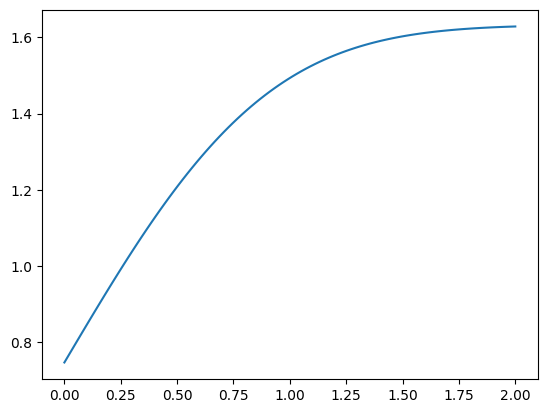

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
# 1.
def f(x):
    return np.exp(-x**2)
# 2.
x_arr = np.linspace(-1,1,100)
y_arr = f(x_arr)
result = np.trapz(y_arr, x_arr)
print(f'trapz result {result:g}')
# 3.
result2 = scipy.integrate.quad(f, -1, 1)
print('quad result', result2)
# 4.
def g(x):
    return scipy.integrate.quad(f, -1, x)[0] # use [0] get the integration
# 5.
x_arr_plot = np.linspace(0,2,100)
y_arr_plot = []
for x in x_arr_plot:
    y_arr_plot.append(g(x))
plt.plot(x_arr_plot, y_arr_plot)

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Week 5b

f(1) 0.36787944117144233
integration using step size 0.01 0.8820807802513008


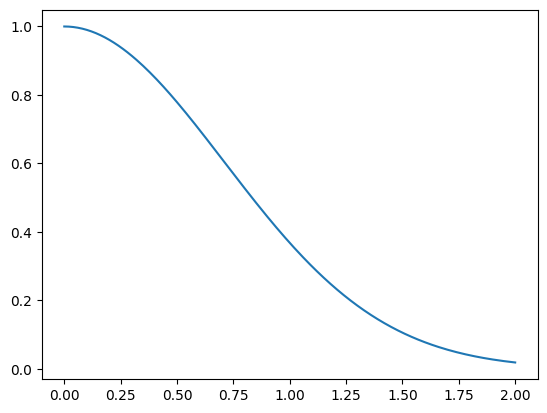

In [ ]:
## use lambda to define a function
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(-x**2)
print('f(1)', f(1))

## plot f(x) between 0 and 2, with step size 0.01
x_arr = np.arange(0, 2.01, 0.01)
y_arr = f(x_arr)
plt.plot(x_arr, y_arr)

## integrate the area under the curve
result = np.trapz(y_arr, x_arr)
print('integration using step size 0.01:', result)

In [ ]:
# doubling the slice method
f = lambda x: x**4 - 2 * x + 1

# calculate the integration (between 0 and 2) using 10 slices (11 sample points)
# first, generate 11 sample points between 0 and 2
x_arr = np.linspace(0, 2, 11)
#or: x_arr = np.arange(0, 2.2, 0.2)
y_arr = f(x_arr)
I_1 = np.trapz(y_arr, x_arr)
print('10-slice answer:', I_1)
# second, repeat for 20 slices (21 sample points)
x_arr = np.linspace(0, 2, 21)
y_arr = f(x_arr)
I_2 = np.trapz(y_arr, x_arr)
print('20-slice answer:', I_2)
epsilon = (1/3)*(I_2 - I_1)
print('error', epsilon)
exact = 4.4
print('true error', I_2 - exact)
I_3 = I_2 + epsilon
print('using with correction:', I_3)

10-slice answer: 4.50656
20-slice answer: 4.42666
error -0.026633333333333432
true error 0.026659999999999684
using with correction: 4.400026666666666


In [ ]:
# using scipy.integrate.romberg
from scipy import integrate
f = lambda x: x**4 - 2 * x + 1
result = integrate.romberg(f, 0, 2, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7cf6c8677d00> from [0, 2]

 Steps  StepSize   Results
     1  2.000000 14.000000 
     2  1.000000  7.000000  4.666667 
     4  0.500000  5.062500  4.416667  4.400000 
     8  0.250000  4.566406  4.401042  4.400000  4.400000 

The final result is 4.4 after 9 function evaluations.


In [ ]:
# most popular is called "quad"
result = integrate.quad(f, 0, 2)
print(result)

(4.3999999999999995, 5.003996496050337e-14)


## Two kinds of syntax

1. using two arrays `np.trapz(y_arr, x_arr)`
2. using function and limit `integrate.quad(f,a,b)`

In [ ]:
# define f(t)
def f(t):
    return np.exp(-t**2)

# integrate between 0 and 1
result = integrate.quad(f, 0, 1)[0] # just want the result, not the error
print(result)

# define E(x) function (the upper limit of the integration is now x)
def E(x):
    return integrate.quad(f, 0, x)[0]


0.7468241328124271
0.8820813907624215


# Week 5a


In [ ]:
true_answer = 4.4

# define the function
import numpy as np
def f(x):
    return x**4 - 2 * x + 1

# define the boundary and slices
a = 0.
b = 2.
h = 0.01


# define the array for midpoint:
x_arr = np.arange(a+0.5*h, b, h)
#print(x_arr)
# sum up the areas of the rectangles
result = np.sum(f(x_arr)) * h
print('mid-point result:', result)
print(abs(result - true_answer)/true_answer)

# define the array for trapezoidal method:
x_arr = np.arange(a+h, b, h) # a+h, a+2h, ..., b-h
# sum up the areas of the trapezoids
extra_term = 0.5*(f(a) + f(b))
sum_arr = extra_term + np.sum(f(x_arr))
result = sum_arr * h
print('trapz result:', result)
print(abs(result - true_answer)/true_answer)

mid-point result: 4.399866667249995
3.030289772846957e-05
trapz result: 4.400266666
6.0605909090889874e-05


In [ ]:
## using np.trapz
# define f(x)
def f(x):
    return x**4 - 2 * x + 1

a = 0.
b = 2.
h = 0.01

# create an x_arr between a and b (have to include both ends!)
x_arr = np.arange(a, b+h, h)

# evaluate y_arr on f(x_arr)
y_arr = f(x_arr)

# np.trapz(y, x)
result = np.trapz(y_arr, x_arr)
print('trapz', result)
print('trapz error', (result-true_answer)/true_answer)

trapz 4.400266665999999
trapz errpr 6.0605909090688016e-05


In [ ]:
## using scipy.integrate.simpson
from scipy.integrate import simpson
result = simpson(y_arr, x_arr)
print(result)

# another way to import
from scipy import integrate
result = integrate.simpson(y_arr, x_arr)
print(result)

4.400000002666667
4.400000002666667


In [ ]:
## practicing gaussian integration
# define the function
def f(x):
    return np.exp(-x**2)
# define x_arr
#x_arr = np.arange(0,2.001, 0.001)
x_arr = np.linspace(0,2,1000)
# define y_arr
y_arr = f(x_arr)
# use trapz or simpson
np.trapz(y_arr, x_arr)

0.8820813662926712

# Week 4b


In [ ]:
#### deep copy vs shallow copy
## shallow copy
import numpy as np
a = np.array([81, 82, 83])
b = a
b[0] = 5
print(a)
print('check if they are the same object:', a is b)

[ 5 82 83]
check if they are the same object: True


In [ ]:
## deep copy
c = np.array([81, 82, 83])
import copy
d = copy.deepcopy(c)
d[0] = 5
print(c)
print('check if they are the same object:', c is d)

[81 82 83]
check if they are the same object: False


In [ ]:
# print 0.1 with 20 sig figs (using f-string)
print(f'{0.1:.20f}')

0.10000000000000000555


In [ ]:
# adding/subtracting big and small numbers (don't do)
print(1e20 + 0.1 - 1e20)

0.0


In [ ]:
# biggest float is 1e308 / smallest is 1e-308
print(1e400)
#print(10**400) # no limit in integer
print(1e-400)

inf
0.0


In [ ]:
# subtracting two numbers very close to each other (don't do)
a = 12345678912345678.0
b = 12345678912345679.0
c = 12345678912345677.0
print(b-a)
print(a-c)

2.0
2.0


In [ ]:
# comparing two floats
a = 0.1 + 0.1 + 0.1
b = 0.3
print(a == b) # don't do it

False


In [ ]:
# use np.isclose to compare two floats
print(np.isclose(a, b))
# or use tolerance to compare two floats
tolerance = 1e-6
print(abs(a - b) < tolerance)

True
True


# Week 4a


Plot this function using the for-loop method
$$
f(x) = e^{-x^2}
$$
for x between -5 and 5

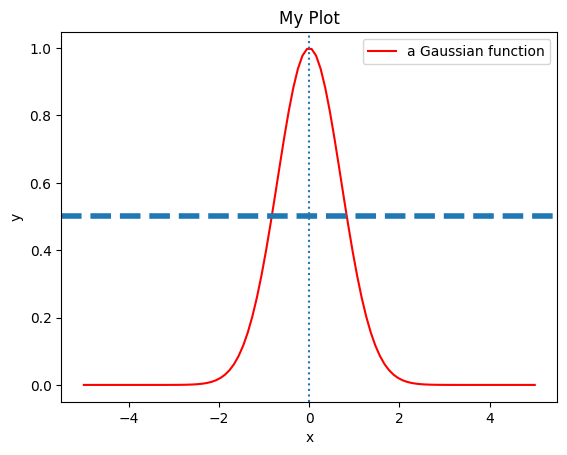

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_arr = np.linspace(-5, 5, 100)
y_arr = []

def f(x):
    return np.exp(-x**2)

for x in x_arr:
    y_arr.append(f(x))

plt.plot(x_arr, y_arr, label='a Gaussian function', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('My Plot')

plt.axvline(0, linestyle=':') # vertical line, dotted
plt.axhline(0.5, linestyle='--', linewidth=4) # horizontal line, dashed

Plot this function
$$f(x)=x^{-5}$$
for x between $10^{-3}$ and $10^3$

1. using linearly spaced `x_arr`
2. using log-spaced `x_arr`

Text(0.5, 1.0, 'We cannot see any features in a linear plot')

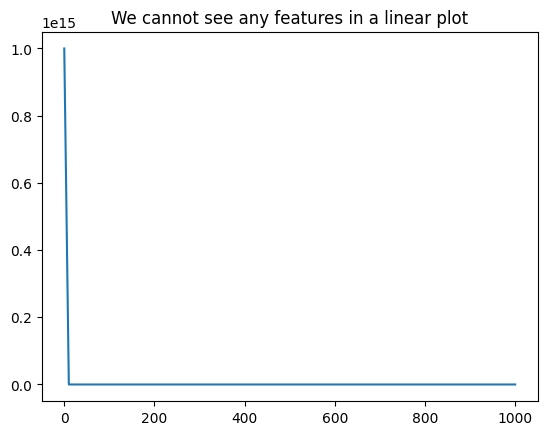

In [ ]:
## linearly spaced x_arr
def f(x):
    return x**(-5)

x_arr = np.linspace(1e-3, 1e3, 100)
y_arr = f(x_arr)
plt.plot(x_arr, y_arr)
plt.title('We cannot see any features in a linear plot')

Text(0.5, 1.0, 'It is a power law!')

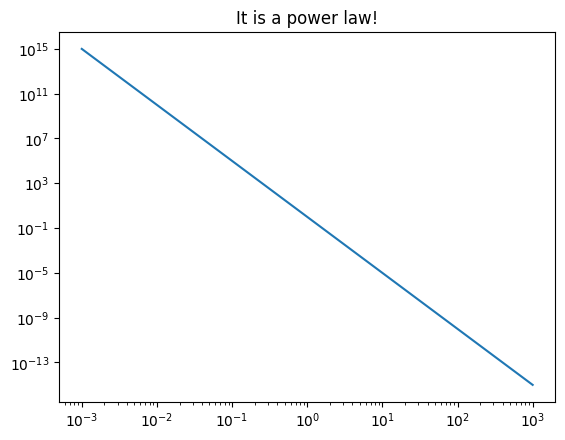

In [ ]:
## log-spaced x-array
x_arr = np.logspace(-3, 3, 100)
## or you can do
## lnx_arr = np.linslace(np.log(1e-3), np.log(1e3), 100)
## x_arr = np.exp(lnx_arr)
y_arr = f(x_arr)
plt.plot(x_arr, y_arr)
plt.xscale('log')
plt.yscale('log')
plt.title('It is a power law!')

# Week 3b

In [ ]:
import numpy as np
matrix = np.array([[1,2],[3,4]])
print(matrix)

[[1 2]
 [3 4]]


1. Get the number 1
2. Get the first row
3. Get the second column
4. Transpose the matrix

In [ ]:
#1.
print(matrix[0,0])
#2.
print(matrix[0,:])
#3.
print(matrix[:,1])
#4.
print(np.transpose(matrix))

1
[1 2]
[2 4]
[[1 3]
 [2 4]]


In [ ]:
# use f-string print e=2.71828..... to 5 decimal places
print(np.e) # too many digits
print(f"This is my favorite number {np.e:.5f}")

2.718281828459045
This is my favorite number 2.71828


# Week 3a


In [ ]:
import numpy as np
fruit_arr = np.array(["apple0", "banana1", "cherry2", "durian3", "eggfruit4", "fig5", "grape6", "honeydew7"])

1. get element 7 (the eighth element)
2. start from 0 and end before 7
3. start from 2 and all the way to the end
4. start from 2 and end before 7
5. start from 2 and end before 7, with an increment of 2
6. take everything from this array
7. reverse this array

In [ ]:
# 1.
print('problem 1', fruit_arr[7])
# 2.
print('problem 2', fruit_arr[0:7])
# 3.
print('problem 3', fruit_arr[2:])
# 4.
print('problem 4', fruit_arr[2:7])
# 5.
print('problem 5', fruit_arr[2:7:2])
# 6.
print('problem 6', fruit_arr[:]) # everything!
# 7.
print('problem 7', fruit_arr[::-1])

problem 1 honeydew7
problem 2 ['apple0' 'banana1' 'cherry2' 'durian3' 'eggfruit4' 'fig5' 'grape6']
problem 3 ['cherry2' 'durian3' 'eggfruit4' 'fig5' 'grape6' 'honeydew7']
problem 4 ['cherry2' 'durian3' 'eggfruit4' 'fig5' 'grape6']
problem 5 ['cherry2' 'eggfruit4' 'grape6']
problem 6 ['apple0' 'banana1' 'cherry2' 'durian3' 'eggfruit4' 'fig5' 'grape6'
 'honeydew7']
problem 7 ['honeydew7' 'grape6' 'fig5' 'eggfruit4' 'durian3' 'cherry2' 'banana1'
 'apple0']


In [ ]:
import numpy as np
sat_scores = np.array([1440, 1256, 1543, 1043, 989, 1412, 1343])
students = np.array(["Elmo", "Big Bird", "Abby", "Bert", "Grover", "Count von Count", "Cookie Monster"])

1. Find students with scores less than 1200
2. Sort students' names, from high score to low score

In [ ]:
# 1
filter_arr = (sat_scores < 1200)
print(students[filter_arr])

['Bert' 'Grover']


In [ ]:
# 2
index_arr = np.argsort(sat_scores)
students_low_to_high = students[index_arr]
students_high_to_low = students_low_to_high[::-1]
print("first solution", students_high_to_low)

# 2 (alternative solution)
index_arr = np.argsort(-sat_scores) # sort by the negative of the scores
print("second solution", students[index_arr])

first solution ['Abby' 'Elmo' 'Count von Count' 'Cookie Monster' 'Big Bird' 'Bert'
 'Grover']
second solution ['Abby' 'Elmo' 'Count von Count' 'Cookie Monster' 'Big Bird' 'Bert'
 'Grover']


# Week 2
Please copy the code to your own Jupyter Notebook.

In [ ]:
import numpy as np
name_arr = np.array(['Abby', 'Ernie', 'Elmo', 'Oscar', 'Bert', 'Grover', 'Big Bird'])
height_arr = np.array([35, 46, 43, 10, 23, 58, 60])

1. Write a filter array that select the height greater than 42.  
2. Print those heights.
3. Print the names of the characters with heights greater than 42.
4. Print the name of the tallest character
5. Print the name of the shortest character
6. Print the names of the characters from the shortest to the tallest.
7. Reverse the order: from the tallest to the shortest




In [ ]:
# 1.
filter_arr = (height_arr > 42)
# 2.
print(height_arr[filter_arr])
# 3.
print(name_arr[filter_arr])
# 4.
index_tallest = np.argmax(height_arr)
print(name_arr[index_tallest])
# 5.
index_shortest = np.argmin(height_arr)
print(name_arr[index_shortest])
# 6.
index_sort = np.argsort(height_arr)
print(name_arr[index_sort])
# 7.
name_sorted_low_to_high = name_arr[index_sort]
name_sorted_high_to_low = name_sorted_low_to_high[::-1] # reverse
print(name_sorted_high_to_low)

[46 43 58 60]
['Ernie' 'Elmo' 'Grover' 'Big Bird']
Big Bird


In [ ]:
# 1^2 + 2^2 + 3^2 + ... +100^2
import numpy as np
x_arr = np.arange(1,101, 1)
print(x_arr)
x_sq_arr = x_arr ** 2
print(np.sum(x_sq_arr))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
338350


In [ ]:
fruit_arr = np.array(["apple", "banana", "kiwi", "mango"])
price_arr = np.array([50, 20, 100, 70])

In [ ]:
# array filtering
print(price_arr > 55)
filter_arr = (price_arr > 55)
print(fruit_arr[filter_arr])

[False False  True  True]
['kiwi' 'mango']


In [ ]:
# np.amax, np.argmax
print(np.amax(price_arr)) # np.max and np.amax are the same
print(np.argmax(price_arr))
index = np.argmax(price_arr)
print(fruit_arr[index])

100
2
kiwi


In [ ]:
# np.amin, np.argmin
print(np.amin(price_arr))
print(np.argmin(price_arr))
index = np.argmin(price_arr)
print(fruit_arr[index])

20
1
banana


In [ ]:
# np.sort, np.argsort
print(np.sort(price_arr))
print(np.argsort(price_arr))
index_arr = np.argsort(price_arr)
print(fruit_arr[index_arr]) # from low to high
# flip the array so that we have from high to low
fruit_sorted_low_to_high = fruit_arr[index_arr]
fruit_sorted_high_to_low = fruit_sorted_low_to_high[::-1]
# flip an array using [::-1]
print(fruit_sorted_high_to_low)

[ 20  50  70 100]
[1 0 3 2]
['banana' 'apple' 'mango' 'kiwi']
['kiwi' 'mango' 'apple' 'banana']


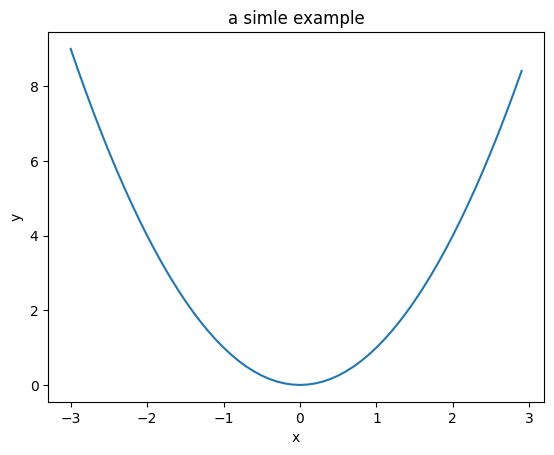

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(-3,3,0.1)
y = x**2
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('a simle example');